In [52]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML


In [53]:
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [0, .7, 0, 0], [0, 2, 0, 0]])
B = np.array([0, 0, 1, .5])


def calculate_next_state(state, time_delta, u):
    if callable(u):
        u = u(state)
    return state + time_delta * (A @ state + B * u)


def simulate_states(initial_state, time_end, time_delta=0.01, u=.4):
    time = 0
    current_state = initial_state
    states = {0: initial_state}
    while time <= time_end and abs(current_state[1]) < 1:
        time += time_delta
        current_state = calculate_next_state(current_state, time_delta, u)
        states[time] = current_state
    return states


def visualize_states(states, title="Zustandsverlauf"):
    fig, ax = plt.subplots()
    ax.plot(states.keys(), states.values(), label=["$p$", "$\\theta$", "$\\dot{p}$", "$\\dot{\\theta}$"])
    ax.set_title(title)
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Zustand")
    ax.legend(loc='upper left')


def calculate_positions(states, arm_length=4):
    positions = {}
    for time, state in states.items():
        theta = state[1]
        p = state[0]

        x = p + np.sin(theta) * arm_length
        y = np.cos(theta) * arm_length
        positions[time] = np.array([x, y])
    return positions


def visualize_positions(positions, title="Positionsverlauf"):
    fig, ax = plt.subplots()
    ax.plot(positions.keys(), positions.values(), label=["x", "y"])
    ax.set_title(title)
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Länge")
    ax.legend(loc='upper left')


def calculate_joint_positions(states, arm_length=4):
    positions = {}
    i = 0
    for time, state in states.items():
        theta = state[1]
        p = state[0]
        base = np.array([p, 0])
        arm = base + np.array([np.sin(theta), np.cos(theta)]) * arm_length
        positions[i] = np.vstack([base, arm])
        i += 1
    return positions


def animate_joint_positions(positions, interval=0.01, title="Positionsanimation"):
    fig, ax = plt.subplots()

    dots, = ax.plot([], [], 'b')
    line, = ax.plot([], [], 'ro', lw=2)
    time = ax.text(0.02, 0.95, '', transform=ax.transAxes)

    ax.set_title(title)
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")

    def init():
        array = np.array(list(positions.values()))
        y_max = np.max(array[:, :, 1])
        y_min = np.min(array[:, :, 1])

        x_max = np.max(array[:, :, 0])
        x_min = np.min(array[:, :, 0])

        ax.set_ylim(y_min - 1, y_max + 1)
        ax.set_xlim(x_min - 1, x_max + 1)

        dots.set_data([], [])
        line.set_data([], [])
        time.set_text('')
        return dots, line, time

    def update(frame):
        position = positions[frame]
        dots.set_data(position[:, 0], position[:, 1])
        line.set_data(position[:, 0], position[:, 1])
        time.set_text(f'Zeit $t={frame * interval}$')
        return dots, line, time

    frames = max(positions.keys())

    ani = FuncAnimation(fig, update, frames=int(frames), interval=interval, blit=True, init_func=init)
    ani.save("animation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


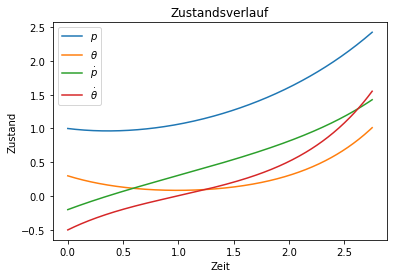

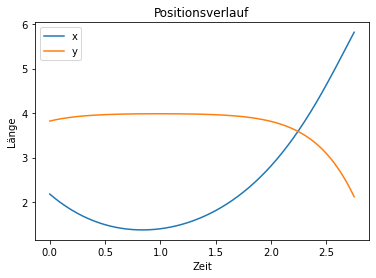

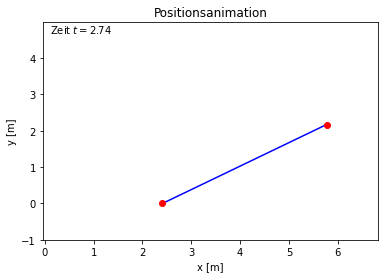

In [54]:
simulation_1 = simulate_states(np.array([1, .3, -.2, -.5]), 100, u=.4)
visualize_states(simulation_1)

visualize_positions(calculate_positions(simulation_1))

animate_joint_positions(calculate_joint_positions(simulation_1))
